In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [4]:
df.notnull().value_counts()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  emp_length  home_ownership  annual_inc  verification_status  issue_d  loan_status  purpose  title  dti   earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  initial_list_status  application_type  mort_acc  pub_rec_bankruptcies  address
True       True  True      True         True   True       True       True        True            True        True                 True     True         True     True   True  True              True      True     True       True        True       True                 True              True      True                  True       335867
                                                                                                                                                                                                                                                                                            False     True                  True        34754
        

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
def convert(x):
    c = x[0]
    v = 0
    if c=='A':
        v = v+35
    elif c=='B':
        v = v+30
    elif c=='C':
        v = v+25
    elif c=='D':
        v = v+20
    elif c=='E':
        v = v+15
    elif c=='F':
        v = v+10
    elif c=='G':
        v = v+5
    c = x[1]
    c = int(c)
    v = v+c
    return v    


In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\nWest Williamside, S..."
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"


In [10]:
df['sub_grade']=df['sub_grade'].apply(convert)

In [11]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,34,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,35,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,33,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,37,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,30,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,34,Michael's Arts & Crafts,5 years,RENT,64000.0,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\nWest Williamside, S..."
396025,10000.0,60 months,10.99,217.38,B,34,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,26,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,31,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"


In [12]:
df.drop(columns='grade',inplace=True,axis=1)

In [13]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,34,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,35,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,33,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,37,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,30,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,34,Michael's Arts & Crafts,5 years,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\nWest Williamside, S..."
396025,10000.0,60 months,10.99,217.38,34,licensed bankere,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,26,Agent,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,31,City Carrier,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"


In [14]:
df['term'] = df['term'].apply(lambda x: int(x[0:3]))

In [15]:
df['loan_status'].value_counts()

loan_status
Fully Paid     269555
Charged Off     66312
Name: count, dtype: int64

In [16]:
df['verification_status'].value_counts()

verification_status
Source Verified    115687
Verified           112520
Not Verified       107660
Name: count, dtype: int64

In [17]:
def digits(x):
    n = ''
    for c in x:
        if c.isdigit():
            n = n+c
    return int(n)


In [18]:
df['emp_length']=df['emp_length'].apply(digits)

In [19]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,34,Marketing,10,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,35,Credit analyst,4,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,33,Statistician,1,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,37,Client Advocate,6,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,30,Destiny Management Inc.,9,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,34,Michael's Arts & Crafts,5,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\nWest Williamside, S..."
396025,10000.0,60,10.99,217.38,34,licensed bankere,2,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36,12.29,700.42,26,Agent,5,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36,9.99,161.32,31,City Carrier,10,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"


<Axes: xlabel='installment', ylabel='loan_amnt'>

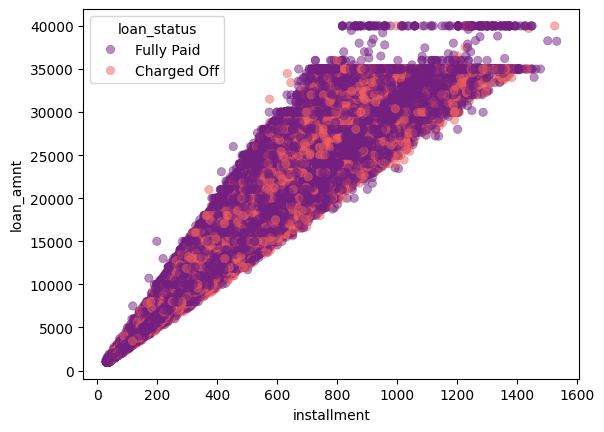

In [20]:
sns.scatterplot(df,x = 'installment',y= 'loan_amnt',hue = 'loan_status',edgecolor = None,alpha =0.5,palette='magma')

In [21]:
import datetime
df = pd.get_dummies(df,columns=['purpose','verification_status','home_ownership','application_type'],drop_first=True)
df['issue_d']= pd.to_datetime(df['issue_d'],dayfirst=False,format='%b-%Y')
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'],dayfirst=False,format='%b-%Y')
df['initial_list_status'] = np.where(df['initial_list_status']=='w',1,0) 
df = pd.get_dummies(df,columns=['sub_grade'],drop_first=True)



In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['loan_status'],axis = 1)
y = df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [23]:
import string
from nltk.corpus import stopwords
def text_processor(x):
    x = x.lower()

    x = [x for x in x if x not in string.punctuation ]

    x = "".join(x)

    x = x.split(' ')

    x = [x for x in x if x not in stopwords.words('english')]
    return x

    

In [24]:
hello = text_processor('Hey!, How are you doing slay queen')

In [25]:
print(hello)

['hey', 'slay', 'queen']


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
count_vec = CountVectorizer(analyzer=text_processor)

In [28]:
#vector = count_vec.fit_transform(X_train['emp_title'])

In [29]:
y.shape

(335867,)

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#vector1 = count_vec.transform(X_test['emp_title'])

In [31]:
naive = MultinomialNB(class_prior=[0.5,1])

In [32]:
#naive.fit(vector,y_train)

In [33]:

#pred = naive.predict(vector1)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
#print(classification_report(y_test,pred))
#print(confusion_matrix(y_test,pred))

<Axes: xlabel='loan_status', ylabel='count'>

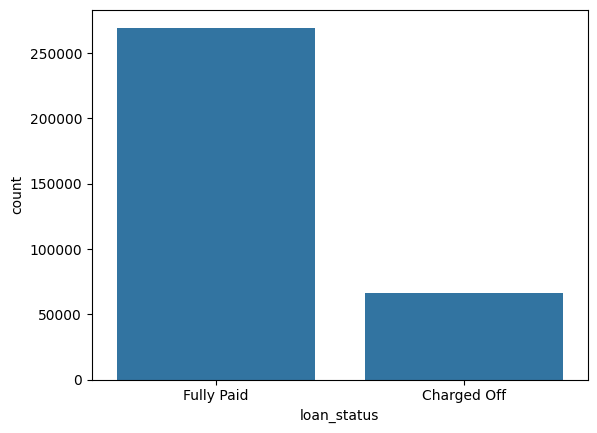

In [36]:
sns.countplot(df,x = 'loan_status')

In [37]:
#pred1 = naive.predict(vector)

In [38]:
#X_train['emp_prob'] = np.where(pred1=='Charged Off',0,1)
#X_test['emp_prob'] = np.where(pred=='Charged Off',0,1)

In [39]:
X_train

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,issue_d,title,dti,...,sub_grade_31,sub_grade_32,sub_grade_33,sub_grade_34,sub_grade_35,sub_grade_36,sub_grade_37,sub_grade_38,sub_grade_39,sub_grade_40
166592,7250.0,36,17.77,261.27,UHS-Pruitt Corporation,5,28430.40,2013-05-01,DebtConsolidationLoan,27.69,...,False,False,False,False,False,False,False,False,False,False
131381,10000.0,36,14.99,346.61,Computer Programmer,6,75000.00,2014-05-01,Home improvement,25.17,...,False,False,False,False,False,False,False,False,False,False
351103,5000.0,36,15.61,174.83,team lead,10,19866.35,2014-07-01,Debt consolidation,28.82,...,False,False,False,False,False,False,False,False,False,False
5004,35000.0,36,12.88,1177.27,Compliance Manager,1,87500.00,2016-01-01,Debt consolidation,13.10,...,False,False,False,False,False,False,False,False,False,False
219931,16000.0,60,21.98,441.73,U.S. Army,10,75000.00,2013-06-01,The Bills,21.73,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229990,12575.0,60,21.67,344.96,Senior App Development Specialist,3,115000.00,2015-03-01,Debt consolidation,9.87,...,False,False,False,False,False,False,False,False,False,False
231037,24000.0,36,15.31,835.62,Federal Aviation Administration,5,120000.00,2013-04-01,Invest Loan,14.51,...,False,False,False,False,False,False,False,False,False,False
138135,5000.0,36,21.15,188.77,Claxton Hepburn Hospital,10,34000.00,2013-08-01,Other,29.29,...,False,False,False,False,False,False,False,False,False,False
278873,3600.0,36,23.43,140.17,Manufacturing,10,35800.00,2014-04-01,Other,3.29,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'sub_grade_7',
       'sub_grade_8', 'sub_grade_9', 'sub_grade_10', 'sub_grade_11',


In [41]:
X_train.drop(['address','emp_title','title','emp_length'],axis=1,inplace=True)
X_test.drop(['address','emp_title','title','emp_length'],axis=1,inplace=True)

In [42]:
X_train

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,sub_grade_31,sub_grade_32,sub_grade_33,sub_grade_34,sub_grade_35,sub_grade_36,sub_grade_37,sub_grade_38,sub_grade_39,sub_grade_40
166592,7250.0,36,17.77,261.27,28430.40,2013-05-01,27.69,1996-09-01,11.0,0.0,...,False,False,False,False,False,False,False,False,False,False
131381,10000.0,36,14.99,346.61,75000.00,2014-05-01,25.17,2008-01-01,10.0,0.0,...,False,False,False,False,False,False,False,False,False,False
351103,5000.0,36,15.61,174.83,19866.35,2014-07-01,28.82,2004-10-01,7.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5004,35000.0,36,12.88,1177.27,87500.00,2016-01-01,13.10,1992-05-01,5.0,1.0,...,False,False,False,False,False,False,False,False,False,False
219931,16000.0,60,21.98,441.73,75000.00,2013-06-01,21.73,1995-10-01,7.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229990,12575.0,60,21.67,344.96,115000.00,2015-03-01,9.87,2010-10-01,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
231037,24000.0,36,15.31,835.62,120000.00,2013-04-01,14.51,2001-05-01,12.0,0.0,...,False,False,False,False,False,False,False,False,False,False
138135,5000.0,36,21.15,188.77,34000.00,2013-08-01,29.29,1994-02-01,18.0,0.0,...,False,False,False,False,False,False,False,False,False,False
278873,3600.0,36,23.43,140.17,35800.00,2014-04-01,3.29,2003-04-01,5.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [43]:
X_test

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,sub_grade_31,sub_grade_32,sub_grade_33,sub_grade_34,sub_grade_35,sub_grade_36,sub_grade_37,sub_grade_38,sub_grade_39,sub_grade_40
254476,20000.0,60,15.61,482.23,92000.0,2014-06-01,16.31,2004-01-01,16.0,0.0,...,False,False,False,False,False,False,False,False,False,False
138718,3000.0,36,14.65,103.49,91000.0,2015-03-01,23.33,2003-03-01,14.0,0.0,...,False,False,False,False,False,False,False,False,False,False
156726,21000.0,36,12.85,706.06,100000.0,2014-01-01,18.50,2000-08-01,13.0,0.0,...,False,False,False,True,False,False,False,False,False,False
102087,4000.0,36,20.80,150.29,108000.0,2013-08-01,13.48,1987-09-01,4.0,0.0,...,False,False,False,False,False,False,False,False,False,False
146512,9600.0,36,13.53,325.92,35000.0,2014-01-01,16.19,1998-06-01,7.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71350,10000.0,60,21.67,274.32,100000.0,2015-04-01,6.95,2001-07-01,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
86918,7200.0,36,8.18,226.23,95000.0,2015-05-01,11.43,2005-08-01,10.0,0.0,...,True,False,False,False,False,False,False,False,False,False
103461,35000.0,36,7.90,1095.16,86156.2,2012-07-01,11.74,2003-09-01,14.0,0.0,...,False,False,False,False,False,False,False,False,True,False
393192,16950.0,36,16.29,598.35,38000.0,2013-01-01,14.56,2004-07-01,8.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [44]:
from keras.api.layers import Dense,Dropout
from keras.api.models import Sequential

In [45]:
model = Sequential()

model.add(Dense(72,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(36,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(18,activation='relu')  )
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
X_train['issue_d_year'] = X_train['issue_d'].apply(lambda x: x.year)
#X_train['issue_d_month'] = X_train['issue_d'].apply(lambda x: np.sin(2*math.pi*(x.month/12.0)))
X_train['c_year'] = X_train['earliest_cr_line'].apply(lambda x: x.year)
#X_train['c_month'] = X_train['earliest_cr_line'].apply(lambda x: np.sin(2*math.pi*(x.month/12.0)))
X_test['issue_d_year'] = X_test['issue_d'].apply(lambda x: x.year)
#X_test['issue_d_month'] = X_test['issue_d'].apply(lambda x: np.sin(2*math.pi*(x.month/12.0)))
X_test['c_year'] = X_test['earliest_cr_line'].apply(lambda x: x.year)
#X_test['c_month'] = X_test['earliest_cr_line'].apply(lambda x: np.sin(2*math.pi*(x.month/12.0)))

In [49]:
scaler = MinMaxScaler()
X_train.drop(['issue_d','earliest_cr_line'],axis=1,inplace=True)
X_test.drop(['issue_d','earliest_cr_line'],axis=1,inplace=True)

In [50]:
X_train

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,sub_grade_33,sub_grade_34,sub_grade_35,sub_grade_36,sub_grade_37,sub_grade_38,sub_grade_39,sub_grade_40,issue_d_year,c_year
166592,7250.0,36,17.77,261.27,28430.40,27.69,11.0,0.0,8299.0,91.2,...,False,False,False,False,False,False,False,False,2013,1996
131381,10000.0,36,14.99,346.61,75000.00,25.17,10.0,0.0,20845.0,86.1,...,False,False,False,False,False,False,False,False,2014,2008
351103,5000.0,36,15.61,174.83,19866.35,28.82,7.0,0.0,10797.0,45.6,...,False,False,False,False,False,False,False,False,2014,2004
5004,35000.0,36,12.88,1177.27,87500.00,13.10,5.0,1.0,6162.0,18.3,...,False,False,False,False,False,False,False,False,2016,1992
219931,16000.0,60,21.98,441.73,75000.00,21.73,7.0,0.0,18435.0,89.9,...,False,False,False,False,False,False,False,False,2013,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229990,12575.0,60,21.67,344.96,115000.00,9.87,9.0,0.0,2044.0,15.8,...,False,False,False,False,False,False,False,False,2015,2010
231037,24000.0,36,15.31,835.62,120000.00,14.51,12.0,0.0,639.0,2.2,...,False,False,False,False,False,False,False,False,2013,2001
138135,5000.0,36,21.15,188.77,34000.00,29.29,18.0,0.0,10653.0,43.3,...,False,False,False,False,False,False,False,False,2013,1994
278873,3600.0,36,23.43,140.17,35800.00,3.29,5.0,1.0,4901.0,43.4,...,False,False,False,False,False,False,False,False,2014,2003


In [51]:
X_train

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,sub_grade_33,sub_grade_34,sub_grade_35,sub_grade_36,sub_grade_37,sub_grade_38,sub_grade_39,sub_grade_40,issue_d_year,c_year
166592,7250.0,36,17.77,261.27,28430.40,27.69,11.0,0.0,8299.0,91.2,...,False,False,False,False,False,False,False,False,2013,1996
131381,10000.0,36,14.99,346.61,75000.00,25.17,10.0,0.0,20845.0,86.1,...,False,False,False,False,False,False,False,False,2014,2008
351103,5000.0,36,15.61,174.83,19866.35,28.82,7.0,0.0,10797.0,45.6,...,False,False,False,False,False,False,False,False,2014,2004
5004,35000.0,36,12.88,1177.27,87500.00,13.10,5.0,1.0,6162.0,18.3,...,False,False,False,False,False,False,False,False,2016,1992
219931,16000.0,60,21.98,441.73,75000.00,21.73,7.0,0.0,18435.0,89.9,...,False,False,False,False,False,False,False,False,2013,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229990,12575.0,60,21.67,344.96,115000.00,9.87,9.0,0.0,2044.0,15.8,...,False,False,False,False,False,False,False,False,2015,2010
231037,24000.0,36,15.31,835.62,120000.00,14.51,12.0,0.0,639.0,2.2,...,False,False,False,False,False,False,False,False,2013,2001
138135,5000.0,36,21.15,188.77,34000.00,29.29,18.0,0.0,10653.0,43.3,...,False,False,False,False,False,False,False,False,2013,1994
278873,3600.0,36,23.43,140.17,35800.00,3.29,5.0,1.0,4901.0,43.4,...,False,False,False,False,False,False,False,False,2014,2003


In [52]:
X_train[['total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies'
       ]]

,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies
166592,24.0,0,0.0,0.0
131381,12.0,0,0.0,0.0
351103,18.0,1,0.0,0.0
5004,15.0,1,0.0,1.0
219931,28.0,0,2.0,0.0
...,...,...,...,...
229990,12.0,0,0.0,0.0
231037,29.0,0,1.0,0.0
138135,22.0,1,0.0,0.0
278873,17.0,1,3.0,1.0


In [53]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [54]:
X_train = scaler.fit_transform(X_train)


In [55]:
X_test = scaler.transform(X_test)


In [56]:
from keras.api.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(patience=25,monitor='val_loss',mode='min',verbose=1)

In [58]:
from keras.api.callbacks import TensorBoard
log_dir = "logs\\fit"
board = TensorBoard(log_dir=log_dir,histogram_freq=1,
                    write_graph=True,
                    write_images=True,
                    update_freq='epoch',
                    profile_batch=2,
                    embeddings_freq=1)


In [59]:
X_train


array([[0.16025641, 0.        , 0.48500195, ..., 0.        , 0.25      ,
        0.73846154],
       [0.23076923, 0.        , 0.37670432, ..., 0.        , 0.5       ,
        0.92307692],
       [0.1025641 , 0.        , 0.40085703, ..., 0.        , 0.5       ,
        0.86153846],
       ...,
       [0.1025641 , 0.        , 0.61667316, ..., 0.        , 0.25      ,
        0.70769231],
       [0.06666667, 0.        , 0.70549279, ..., 0.        , 0.5       ,
        0.84615385],
       [0.79038462, 1.        , 0.56096611, ..., 0.        , 0.25      ,
        0.63076923]])

In [60]:
model.fit(x = X_train,y = y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop,board],batch_size=256,class_weight={1:5,0:1})

Epoch 1/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.1583 - val_loss: 0.7001
Epoch 2/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.1198 - val_loss: 0.6844
Epoch 3/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.1168 - val_loss: 0.6627
Epoch 4/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1062 - val_loss: 0.6750
Epoch 5/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1003 - val_loss: 0.6691
Epoch 6/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.1027 - val_loss: 0.6835
Epoch 7/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.0968 - val_loss: 0.6557
Epoch 8/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.0985 - val_loss: 0.6430
Epoch 9/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.1013 - val_loss: 0.6898
Epoch 10/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.0964 - val_loss: 0.6772
Epoch 11/600
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.0914 - val_loss: 0.6519
Epoch 12/600
984/984 ━━━━━━━━━━━━━━━━━━━━

In [61]:
loss = pd.DataFrame(model.history.history)

<Axes: >

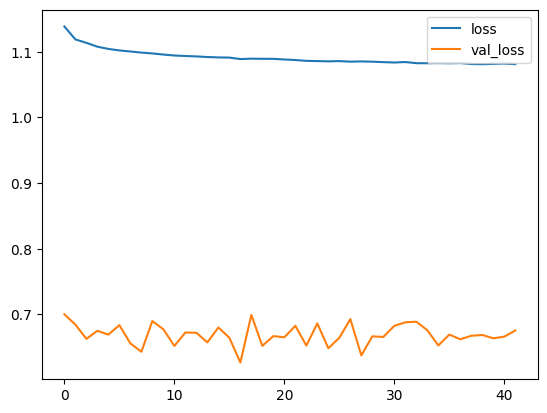

In [62]:
loss.plot()

In [63]:
from sklearn.metrics  import classification_report,confusion_matrix
pred = model.predict(X_test)
pred
pred = np.where(pred>0.5,1,0)

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [64]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

In [65]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69     67431
           1       0.30      0.75      0.42     16536

    accuracy                           0.60     83967
   macro avg       0.60      0.66      0.56     83967
weighted avg       0.78      0.60      0.64     83967

[[37990 29441]
 [ 4150 12386]]
